In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LinearRegresion:
  def __init__(self, fit_intercept=True):
    self.coedf_ = None
    self.intercept_ = None
    self._fit_intercept = fit_intercept

  def __repr__(self):
    return "Saya Adalah Model Regresi Linear"

  def fit(self, X, y):
    """
    Fit model coeffision

      Arguments :
      X : 1D atau 2D Array Number
      Y : 1D Array Number
    """

    # cek apakah 2d atau 1d
    if len(X.shape) == 1:
      X = X.reshape(-1,1)

    # tambah bias fit_intercept jika bernilai true
    if self._fit_intercept:
      X_biased = np.c_[np.ones(X.shape[0]), X]
    else:
      X_biased = X

    # solusi
    xTx = np.dot(X_biased.T, X_biased)
    inverse_xTx = np.linalg.inv(xTx)
    xTy = np.dot(X_biased.T, y)
    coeft = np.dot(inverse_xTx, xTy)

    # set atribut
    if self._fit_intercept:
      self.intercept_ = coeft[0]
      self.coeft_ = coeft[1:]
    else:
      self.intercept_ = 0
      self.coeft_ = coeft

In [ ]:
Test = LinearRegresion()
print(Test)

Saya Adalah Model Regresi Linear


In [ ]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.random(20)
print("X : ",X)
print("y : ",y)

X :  [[3.53174058 7.00712268]
 [2.59016882 9.20590634]
 [2.28791741 0.8277618 ]
 [8.36513288 1.79737705]
 [7.03355331 5.18846321]
 [8.65584197 3.15655048]
 [0.69314032 9.79015981]
 [5.34812373 6.47343065]
 [1.59651142 6.18328909]
 [4.99978659 3.36002568]
 [2.00848837 9.22191034]
 [0.44498845 7.11809444]
 [7.07127736 6.16884005]
 [7.38337368 3.28012416]
 [3.33074887 6.54842409]
 [0.21203284 5.70423002]
 [1.35056318 6.82181187]
 [1.19718214 8.91581362]
 [5.37194844 1.13447903]
 [5.24718586 9.6279267 ]]
y :  [ 4.96669725 -0.5875143   7.19049147 27.38764974 18.76711031 26.92105221
 -9.09483487 12.2794065  -0.59813457 14.77000167 -3.13199258 -5.32513986
 17.75730485 23.5594035   4.97826573 -4.99472114 -1.74169671 -5.54275492
 18.71859655  8.6229256 ]


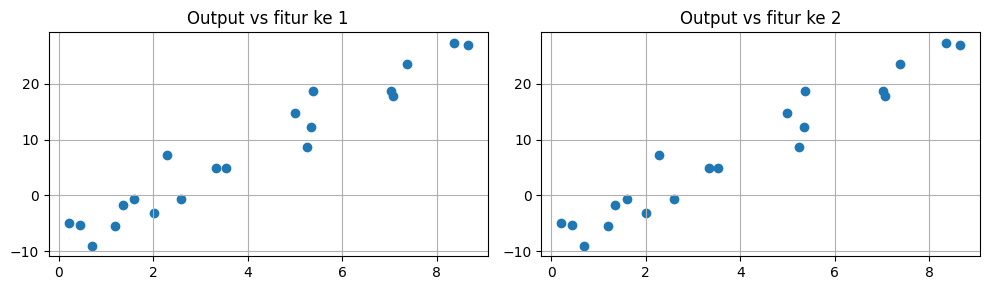

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs fitur ke 1")
ax[0].grid(True)
ax[1].scatter(X.T[0],y)
ax[1].set_title("Output vs fitur ke 2")
ax[1].grid(True)
fig.tight_layout()
plt.show()

In [ ]:
print(Test.fit(X,y))

None


In [ ]:
#  koefision
print("Koefision Regresi :-> ",Test.coeft_,"\n")

#  intercept
print("Intercept :-> ",Test.intercept_)

Koefision Regresi :->  [ 3.47313431 -1.16050391] 

Intercept :->  0.8947024632415358


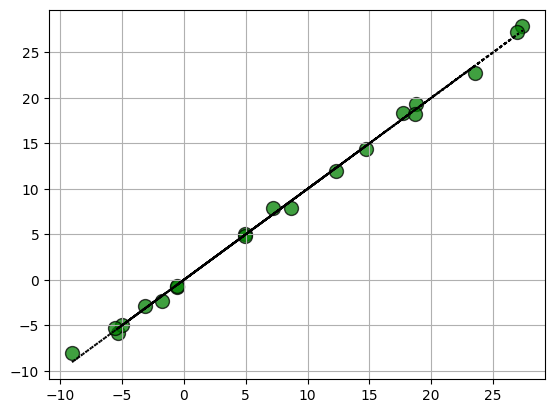

In [ ]:
y_pred = np.dot(X, Test.coeft_) + Test.intercept_

plt.scatter(y, y_pred, s=100, alpha=0.75,color="green",edgecolors="k")
plt.plot(y, y, c="k", linestyle="dotted")
plt.grid(True)
plt.show()

In [ ]:
# Enkapsulation extend LinearRegresion
class EncapsulationRegresi(LinearRegresion):

  def fit(self, X, y):
    """
    Fit model coeffision

      Arguments :
      X : 1D atau 2D Array Number
      Y : 1D Array Number
    """

    # cek apakah 2d atau 1d
    if len(X.shape) == 1:
      X = X.reshape(-1,1)

    # tambah bias fit_intercept jika bernilai true
    if self._fit_intercept:
      X_biased = np.c_[np.ones(X.shape[0]), X]
    else:
      X_biased = X

    # solusi
    xTx = np.dot(X_biased.T, X_biased)
    inverse_xTx = np.linalg.inv(xTx)
    xTy = np.dot(X_biased.T, y)
    coeft = np.dot(inverse_xTx, xTy)

    # set atribut
    if self._fit_intercept:
      self.intercept_ = coeft[0]
      self.coeft_ = coeft[1:]
    else:
      self.intercept_ = 0
      self.coeft_ = coeft

    # prediction
    self.fitted_ =np.dot(X, Test.coeft_) + Test.intercept_

  def showPlot(self, reference_line = False):
    plt.title("True vs. fitted values", fontsize = 14)
    plt.scatter(y, self.fitted_, s=100, alpha=0.75, color="green",edgecolor="k")
    if reference_line:
      plt.plot(y, y, c= 'k', linestyle='dotted')
    plt.xlabel("Nilai Asli")
    plt.ylabel("Penyesuaian")
    plt.grid(True)
    plt.show()

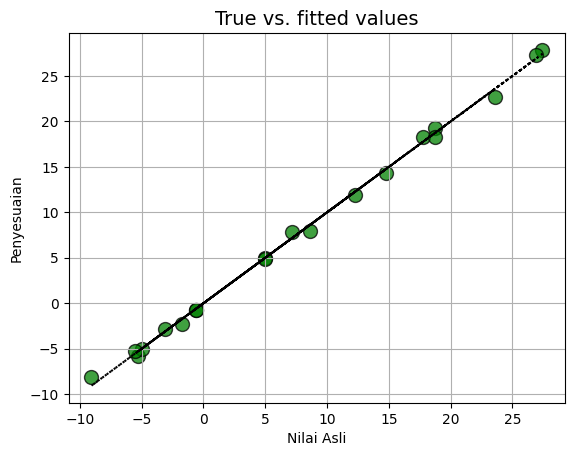

In [ ]:
cobaRegresi = EncapsulationRegresi()
cobaRegresi.fit(X,y)

# call method plot_fitted
# cobaRegresi.showPlot()
cobaRegresi.showPlot(reference_line=True)

In [ ]:
# add a predict Method extend EncapsulationRegresi

class PredictionRL(EncapsulationRegresi):
  def prediksi(self, X):
    """
    Output model prediction
    Argumrnts:
    X: 1D or 2D numpy Array
    """
    # cek dulu apakah X berada 1D atau 2D
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    self.predicted_ = self.intercept_ + np.dot(X, self.coeft_)
    return self.predicted_

In [ ]:
sample = 100
X_new = 20*np.random.random(size=(sample,2))
y_new = 4 * X_new.T[0]-1.2 * X_new.T[1]+2 * np.random.random(sample)
modelRegresi = PredictionRL()
modelRegresi.fit(X,y)
y_pred = modelRegresi.prediksi(X_new)
print(y_pred)

[ 38.71560075  48.7927382   -0.74872043  38.68392932   3.07388756
   1.03428593   1.90261759  -4.51817396  -1.14237043  39.01292865
   7.28575313  57.30783684  41.51693085  20.32200917  -7.53970761
  45.188983     0.42358732  59.12852115   5.36939293  42.70680028
   2.73539401  53.07597934   8.87973541  60.17089968  11.13972225
  59.51999576  17.98776378  44.82052248   4.24293341 -13.11302408
   5.22860562   2.40233106  19.12292289  15.85288934  49.31900281
  11.78775869   0.41947429  35.54139136  32.20237996  21.11091972
  -2.70626075  25.14370362  33.09813767  43.1531293   -4.39637492
  40.32516332 -13.72217302  28.86061394  45.34543247   9.87994445
  50.08225908  32.93570508   0.91627962  44.82901932  28.58437508
  60.43195578  41.42166568   3.38440274   8.16575258  13.20171361
  -9.64400971  30.20089643  31.59746326  54.86135093  26.21124372
  19.67844747  14.75740979  29.59596158  15.06789222  26.04770963
  39.92158134  38.8206282   44.96780961  27.76471824  -0.38005784
  43.64249

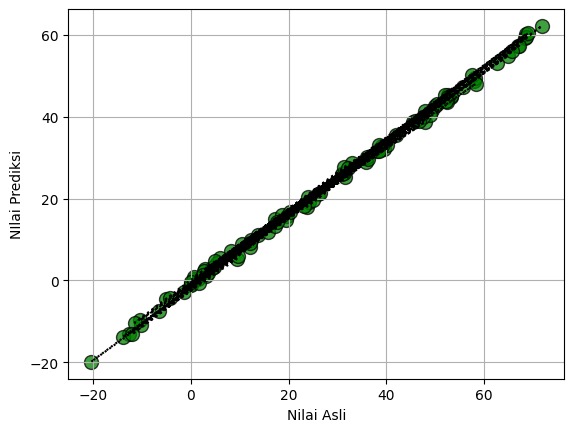

In [ ]:
plt.scatter(y_new, y_pred, s=100, alpha=0.75, color="green",edgecolor="k")
plt.plot(y_new, y_pred, c= 'k', linestyle='dotted')
plt.xlabel("Nilai Asli")
plt.ylabel("NIlai Prediksi")
plt.grid(True)
plt.show()